# 인공지능 기반 자연어처리

인간의 언어를 컴퓨터와 같은 기계가 묘사할 수 있도록 연구하고 구현하는 분야

: 음성 - Text화 - 말뭉치 사전 기준 토큰화 - 입력벡터 - 딥러닝 모델 처리 - 출력벡터 - 말뭉치 사전 참조 Text 벡터화 - 음성화

# 1.자연어처리 예제

## 가.텍스트와 음성변환 : gTTS, SpeechRecognition

텍스트를 음성으로 변환 라이브러리 : https://pypi.org/project/gTTS/

In [1]:
# text to speech(TTS 음성변환)를 위한 라이브러리
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires click<8.0,>=5.1, but you have cl

음성인식 라이브러리 : https://pypi.org/project/SpeechRecognition/

In [2]:
# 음성파일 변환 라이브러리(mp3 ->wav)
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# speech to text(STT 음성인식) 처리를 위한 라이브러리
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 50.0 MB/s eta 0:00:00


## 나.Text를 음성으로 변환: TTS 기술

In [4]:
from gtts import gTTS
text ="안녕하세요 여러분 자연어처리 너무 재미 있지요"

tts = gTTS(text=text, lang='ko')
tts.save("hello.mp3")

좌측 탐색기 폴더를 열고 hello.mp3파일을 다운로드 받아서 들어보세요!

## 다.음성을 Text로 변환 : STT 기술

In [5]:
#음성 파일형식 변환 
from pydub import AudioSegment
input_file = AudioSegment.from_mp3("hello.mp3")
input_file.export(out_f="hello.wav", format="wav")

<_io.BufferedRandom name='hello.wav'>

In [6]:
#STT 실행
import speech_recognition as sr
input_audoi = sr.AudioFile("hello.wav")
with input_audoi as source:
      r = sr.Recognizer()
      audio = r.record(source, duration=14)
r.recognize_google(audio_data = audio, language='ko-KR')

result2:
{   'alternative': [{'confidence': 0.92365956, 'transcript': '재미있지요'}],
    'final': True}


'재미있지요'

## 라.문서 생성(GPT3 text generation) : 한국어 사전학습 모델

더 많은 정보와 모델은 [Github](https://github.com/kiyoungkim1/LMkor)을 확인해 주세요.

In [7]:
# 필요한 라이브러리 설치
!git clone https://github.com/kiyoungkim1/LMkor
!pip3 install -q transformers

from LMkor.examples.gpt3_generation import Inference
inference = Inference('kykim/gpt3-kor-small_based_on_gpt2')

Cloning into 'LMkor'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 101 (delta 17), reused 11 (delta 11), pack-reused 80
Receiving objects: 100% (101/101), 45.28 KiB | 11.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.4 MB/s eta 0:00:00


Downloading:   0%|          | 0.00/120 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/344k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/621 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [8]:
# 텍스트 생성, 매번 다르게 
text = '인생은'

inference(text, howmany=3)

0: 인생은 내가 만든 것!! 내 것이 된 것..! 그 외엔 다른 것도 할 수 있다. ^ ^. ㅎㅎ. ㅎ.
1: 인생은 내가 원해서 사는 거야. 그게 내 인생이야. 내 인생을 내가 어떻게 살아가냐에 대한 문제이지. 내가 살아오면서 가장 많이 배운 게 그게 아니거든. 그래서 내가 원하는 대로 살아가면서 살아가다 보면 내가 어떤 삶을 살고
2: 인생은 우리 모두에게 좋은 기억과 추억을 만들어 주었고, 그 추억은 지금도 우리 곁에 있다. 하지만 그 기억은 우리의 삶을 지배하고, 우리의 삶에 대한 우리의 믿음을 짓밟고, 우리들의 삶을 파괴하며, 우리는 우리를 사랑하는 것을 잃


## 마.문서 요약(Summarization with seq2seq initialized with pre-trained Bert model)

더 많은 정보와 모델은 [Github](https://github.com/kiyoungkim1/LMkor)을 확인해 주세요.

In [9]:
# 필요한 라이브러리 설치
!git clone https://github.com/kiyoungkim1/LMkor
!pip3 install -q transformers

from LMkor.examples.bertshared_summarization import Summarize
summarize = Summarize('kykim/bertshared-kor-base')

fatal: destination path 'LMkor' already exists and is not an empty directory.


Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/344k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.24k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/589M [00:00<?, ?B/s]

In [10]:
# 텍스트 요약문 생성
text = '''
LG전자가 스마트폰을 담당하는 MC(모바일커뮤니케이션)사업부 분할 및 매각을 위한 법률 자문 업무를 김앤장법률사무소에 맡겼다. MC사업부 매각 작업에 속도가 붙을지 관심이 집중되고 있다.
22일 인수합병(M&A)업계에 따르면 LG전자는 최근 MC사업부 분할 후 매각 방안 등을 포괄적으로 검토하기 위해 김앤장을 법률자문사로 선임한 것으로 알려졌다. 회계·실사 자문은 EY한영회계법인에 맡길 가능성이 큰 것으로 전해졌다. 김앤장 등 자문사들은 사업본부를 분할한 뒤 사업양수도나 분할사업부의 지분 매각, 지식재산권(IP) 매각 등을 놓고 검토에 들어간 것으로 알려졌다.
업계에서는 LG전자가 MC사업본부를 통매각하기보다는 ‘쪼개기 매각’에 나설 것으로 보고 있다. 스마트폰 선행기술 연구개발(R&D) 등 핵심 기능만 남겨둔 채 매각을 시도할 것으로 관측하고 있다. 앞서 권봉석 LG전자 사장은 사내 메시지를 통해 임직원에게 “현재 모든 가능성을 열어 두고 사업 운영방향을 면밀히 검토하고 있다”고 밝히며 매각 추진을 암시했다. M&A업계 관계자는 “거래가 성사되기도 전에 사업 전면 재검토를 공식화한 것은 상당히 이례적”이라며 “향후 매각이 잘 이뤄지지 않더라도 모바일 사업을 철수하겠다는 배수진을 둔 것으로 보인다”고 설명했다.
다만 원매자를 찾기가 쉽지 않을 것이란 전망이 우세하다. LG전자 모바일 사업은 한때 글로벌시장에서 톱5 안에 드는 기술력을 인정받았지만 누적 적자만 5조원에 달하고 있다. 업계에서 평가하는 MC사업부의 가치도 5000억원대에서 수조원대까지 편차가 상당히 크다.
상대적으로 해외 원매자들의 인수의사가 더 확실한 것으로 알려지고 있다. 북미사업 등 글로벌 시장 확장을 원하는 후발기업들이 주요 대상이다. 베트남의 빈그룹과 중국 기업 등이 유력하게 거론된다. 증권업계를 중심으로는 스마트 기기를 연결하는 사물인터넷(IoT) 사업을 염두에 둔 구글, 페이스북 같은 미국 정보기술(IT) 기업들도 원매자 후보군으로 꼽고 있다.
'''

summarize(text)

22일 인수합병 ( m & a ) 업계에 따르면 스마트폰 선행기술 연구개발 ( r & d ) 등 핵심 기능만 남겨둔 채 매각을 시도할 것으로 관측되고 있으며 업계에서는 mc사업부 매각 작업에 속도가 붙을지 관심이 집중되고 있다.


#  2.문서요약 DTM TF-IDF

In [11]:
docs = '''오늘은 매우 좋은 날씨 입니다
내일도 매우 좋은 날씨를 기대합니다
토픽 모형을 이용하여 문서를 모형에 적합시켜 문서 내용을 분석하는 방법은 매우 쉽다고 생각할 수 있습니다'''
doc_list = docs.split('\n') 
doc_list = [v for v in doc_list if v]
print(len(doc_list))

3


In [12]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 34.1 MB/s eta 0:00:00


In [13]:
import konlpy
docs_list =[]
for doc in doc_list:
    nouns = konlpy.tag.Okt().nouns(doc)
    docs_list.append(' '.join(nouns))
print(docs_list)

['오늘 매우 날씨', '내일 매우 날씨', '토픽 모형 이용 문서 모형 적합 문서 내용 분석 방법 매우 생각 수']


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() #vocabulary=vocab 지정 또는 미지정 가능
dtm = vect.fit_transform(docs_list).toarray()
vocab = vect.get_feature_names_out()
pd.DataFrame(dtm, columns=vocab)

,날씨,내용,내일,매우,모형,문서,방법,분석,생각,오늘,이용,적합,토픽
0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,2,2,1,1,1,0,1,1,1


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=vocab)
tfidf = tfidfv.fit_transform(docs_list).toarray()
pd.DataFrame(tfidf, columns=vocab)

,날씨,내용,내일,매우,모형,문서,방법,분석,생각,오늘,이용,적합,토픽
0,0.547832,0.000000,0.000000,0.425441,0.000000,0.000000,0.000000,0.000000,0.000000,0.720333,0.000000,0.000000,0.000000
1,0.547832,0.000000,0.720333,0.425441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.255248,0.000000,0.150754,0.510496,0.510496,0.255248,0.255248,0.255248,0.000000,0.255248,0.255248,0.255248


In [16]:
import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
topics =[]
n_top = 2
for line in tfidf_order:
  topic = [vocab[x] for x in line[:n_top]]
  topics.append(topic)
df = pd.DataFrame(topics)
df

,0,1
0,오늘,날씨
1,내일,날씨
2,문서,모형


# 3.위키백과 문서 토픽모형 사례

1.전체 문서들에 대한 한글형태소 분석기 등의 전처리를 통하여 corpus(문서리스트)와 tdoc_list(문서별토큰리스트)을 만든다.

2.sklearn의 CountVectorizer를 이용해서 DTM을 구하고, TfidfVectorizer 클래스로 TF-IDF 행렬을 구하여 토픽과 유사성 탐색한다.

3.Gensim 라이브러리를 이용하여 LDA 모형을 학습시켜 문서별 토픽과 토픽별 키워드 등을 분석한다. 

4.wordcloud, pyLDAvis, Matplotlib 등으로 시각화 표현 

## 가.전처리 후 토큰과 코퍼스 만들기

In [17]:
# 분석대상 문서들 가져오기 : 
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/kowiki_10.txt

--2023-01-13 19:23:29--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/kowiki_10.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55488 (54K) [text/plain]
Saving to: ‘kowiki_10.txt’

kowiki_10.txt       100%[===================>]  54.19K  --.-KB/s    in 0.004s  

2023-01-13 19:23:29 (14.1 MB/s) - ‘kowiki_10.txt’ saved [55488/55488]



In [18]:
# 문서형태 탐색
with open("kowiki_10.txt") as f:
  data = f.read()
docs = data.split("\n\n\n\n")
docs = [ doc for doc in docs if doc ]
len(docs)

10

In [19]:
# 문서별로 한글 형태소 분석기로 전처리 후 형태소만 추출하고, Stop words 제거, 한글자 제거 후 tdoc_list으로 담기 
import konlpy
tdoc_list=[]
doc_list =[]
for doc in docs:
  morp = konlpy.tag.Okt().nouns(doc)
  morp = [x for x in morp if len(x) > 1]
  tdoc_list.append(morp)
  doc_list.append(' '.join(morp))

print(doc_list)
print(tdoc_list)

['지미 카터 제임스 지미 카터 주니어 민주당 출신 미국 대통령 지미 카터 조지아주 섬터 카운티 플레인스 마을 조지아 공과 대학교 졸업 해군 전함 원자력 잠수함 승무원 미국 해군 대위 이후 땅콩 면화 별명 땅콩 농부 조지아 상원 의원 선거 낙선 하나 선거 부정선거 입증 당선 조지아 지사 선거 낙선 조지아 지사 역임 대통령 조지아주 상원의원 조지아 지사 근무 조지아 지사 미국 흑인 용법 대통령 선거 민주당 후보 출마 도덕 주의 정책 포드 당선 카터 대통령 에너지 개발 촉구 공화당 반대 무산 카터 이집트 이스라엘 조정 캠프 데이비드 안와르 사다트 대통령 메나헴 수상 중동 평화 캠프데이비드 협정 체결 공화당 미국 유대인 단체 반발 백악관 양국 간의 평화조약 또한 소련 전략 무기 제한 협상 조인 카터 후반 당시 대한민국 인권 후진국 국민 인권 위해 노력 취임 이후 계속 도덕 정치 이란 미국 대사관 인질 사건 인질 구출 실패 이유 대통령 선거 공화당 로널드 레이건 후보 재선 또한 임기 말기 소련 아프가니스탄 침공 사건 올림픽 국가 보이콧 지미 카터 대한민국 관계 영향 대통령 하나 인권 문제 미군 철수 문제 한미 관계 대한민국 대한 북한 위협 대비 한미연합사 창설 단계 미군 철수 미군 사령부 정보기관 의회 반대 미군 완전 철수 대신 감축 또한 박정희 정권 인권 문제 논란 불협화음 하순 대한민국 방문 관계 다소 회복 대한민국 정치 격변 당시 대통령 대해 태도 대한민국 고조 반미 운동 원인 박정희 대통령 김재규 중앙 정보 부장 살해 대해 사건 충격 사이러스 밴스 국무장관 사절 파견 군사 반란 쿠데타 대해 초기 비난 미국 정부 신군부 설득 한계 묵인 태도 보이 퇴임 이후 민간 자원 적극 활용 비영리 기구 카터 재단 설립 민주주의 실현 위해 세계 선거 감시 활동 기니 벌레 드라쿤쿠르스 질병 방재 위해 미국 빈곤층 지원 활동 사랑 집짓기 운동 국제 분쟁 중재 활동 카터 카터 행정부 이후 미국 북핵 위기 코소보 전쟁 이라크 전쟁 미국 군사 행동 최후 선택 전통 사고 군사 행동 선행

## 나.Sklearn으로 DTM, TF-IDF를 만들어 탐색하기

In [20]:
# DTM 구하기, corpus 문서단위 리스트, 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
vect = CountVectorizer()
dtm = vect.fit_transform(doc_list).toarray()
vocab = vect.get_feature_names_out()
pd.DataFrame(dtm, columns=vocab)

,가공,가까이,가나다,가라,가산,가설,가스,가우스,가운데,가장,...,후보,후진국,훈민정음,훗날,흑인,흡수,흡열반응,흥미,희곡,힐베르트
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,1,0,0,4,...,0,0,0,0,0,2,2,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,2,0,2,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# TFIDF 도표 구하기 : 딕셔너리는 vocab, 분석대상은 corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=vocab)
tfidf = tfidfv.fit_transform(doc_list).toarray()
pd.DataFrame(tfidf, columns=vocab)

,가공,가까이,가나다,가라,가산,가설,가스,가우스,가운데,가장,...,후보,후진국,훈민정음,훗날,흑인,흡수,흡열반응,흥미,희곡,힐베르트
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.05183,0.025915,0.000000,0.000000,0.025915,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.022825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019403
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.030403,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060805,0.060805,0.000000
4,0.000000,0.000000,0.046108,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.011997,0.000000,0.000000,0.000000,0.000000,0.011997,0.011997,0.000000,0.00000,0.035689,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.023993,0.023993,0.000000,0.000000,0.000000
6,0.000000,0.050834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.037807,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023953,0.00000,0.017815,...,0.00000,0.000000,0.000000,0.011977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.255101,0.000000,0.000000,0.000000,0.05102,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130116
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 문서별 토픽 탐색

In [22]:
import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
tfidf_order

array([[ 363,  241, 1163, ...,  828,  829,    0],
       [ 628,  478,  405, ...,  842,  843,    0],
       [ 535,  628,  533, ...,  892,  893,    0],
       ...,
       [ 415,  313,  431, ...,  857,  860,    0],
       [1127, 1090,    4, ...,  887,  888,    0],
       [ 807,  810,  396, ...,  885,  886,    0]])

In [23]:
# TF-IDF 문서별 토픽 추출 - 다른 문서와 차별화되는 유니크한 주제 
topics =[]
n_top = 10 # topic 개수
for line in tfidf_order:
  topic = [vocab[x] for x in line[:n_top]]
  topics.append(topic)

df = pd.DataFrame(topics)
df

,0,1,2,3,4,5,6,7,8,9
0,미국,대통령,카터,인권,대한민국,조지아,선거,해결,북한,군사
1,수학,분야,발전,공간,구조,연구,개념,기하학,대한,탐구
2,상수,수학,상관관계,물리,정의,우리,골롬,딕맨,변량,수이
3,문학,감상,작품,이야기,문예학,사람,범주,예술,대중문학,씌어
4,목록,국가,기준,나라,협약,몬테비데오,포함,정보,조건,대한
5,화학,물질,원자,화합물,원소,결합,반응,금속,유기,에너지
6,체첸,공화국,러시아,러시아인,체첸인,인구,인구시인,제국,지역,민족
7,방정식,맥스웰,법칙,논문,자기,전하,전류,전자기파,헤비사이드,유도
8,초월수,집합,가산,문제,증명,초월,수임,대수,힐베르트,제시
9,음계,음악,반음계,온음계,이름,전통,서양,장음계,음정,계이름


## 다.Gensim으로 LDA 모형에 적합

In [24]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# LDA 모형 적합, g_dictionary 사전 만들고, g_corpus(word, count)로 정리하고, ldamodel 객체 생성 (토픽4)
import gensim
g_dictionary = gensim.corpora.Dictionary(tdoc_list)
g_corpus = [g_dictionary.doc2bow(text) for text in tdoc_list]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=4, passes=15)
# ldamodel.print_topics()

### 문서별 토픽 정리

In [26]:
def format_topics_sentences(ldamodel=None, g_corpus=g_corpus, tokens=tdoc_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[g_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['주요토픽', '토픽 기여도', '주요 토픽 키워드']

    # Add original text to the end of the output
    contents = pd.Series(tdoc_list)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [27]:
# 문서별 토픽정리 
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, g_corpus=g_corpus, tokens=tdoc_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['문서번호', '주요토픽', '토픽 기여도', '키워드', '토큰']
df_dominant_topic

,문서번호,주요토픽,토픽 기여도,키워드,토큰
0,0,2.0,0.9984,"음계, 미국, 국가, 대통령, 체첸, 목록, 상수, 카터, 음악, 인권","[지미, 카터, 제임스, 지미, 카터, 주니어, 민주당, 출신, 미국, 대통령, 지..."
1,1,0.0,0.9987,"수학, 문학, 집합, 분야, 초월수, 연구, 개념, 발전, 대한, 구조","[수학, 수학, 구조, 공간, 변화, 미적분, 개념, 학문, 현대, 수학, 형식, ..."
2,2,2.0,0.8171,"음계, 미국, 국가, 대통령, 체첸, 목록, 상수, 카터, 음악, 인권","[수학, 상수, 수학, 상수, 변량, 변수, 반대말, 물리, 상수, 달리, 수학, ..."
3,3,0.0,0.9977,"수학, 문학, 집합, 분야, 초월수, 연구, 개념, 발전, 대한, 구조","[문학, 문학, 언어, 예술, 표현, 제재, 의미, 출하, 인간, 사회, 묘사, 예..."
4,4,2.0,0.9947,"음계, 미국, 국가, 대통령, 체첸, 목록, 상수, 카터, 음악, 인권","[나라, 목록, 문서, 나라, 목록, 세계, 나라, 현황, 주권, 승인, 정보, 개..."
5,5,3.0,0.9993,"방정식, 맥스웰, 화학, 원소, 물질, 원자, 화합물, 법칙, 결합, 자기","[화학, 화학, 물질, 성질, 조성, 구조, 변화, 수반, 에너지, 변화, 연구, ..."
6,6,2.0,0.9943,"음계, 미국, 국가, 대통령, 체첸, 목록, 상수, 카터, 음악, 인권","[체첸, 공화국, 체첸, 공화국, 체첸, 러시아, 공화국, 체첸, 사용, 언어, 체..."
7,7,3.0,0.9990,"방정식, 맥스웰, 화학, 원소, 물질, 원자, 화합물, 법칙, 결합, 자기","[맥스웰, 방정식, 맥스웰, 방정식, 전기, 자기, 발생, 전기장, 자기장, 전하,..."
8,8,0.0,0.9941,"수학, 문학, 집합, 분야, 초월수, 연구, 개념, 발전, 대한, 구조","[초월수, 초월수, 계수, 유리수, 방정식, 해도, 복소수, 방정식, 수인, 대수,..."
9,9,2.0,0.9931,"음계, 미국, 국가, 대통령, 체첸, 목록, 상수, 카터, 음악, 인권","[음계, 음계, 음악, 음높이, 순서, 집합, 악곡, 주로, 구성, 음계, 종류, ..."


### 토픽별 키워드 정리

In [28]:
# 토픽별 키워드와 관련 토큰 정리
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('주요토픽')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['토픽 기여도'], ascending=False).head(1)], axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['토픽번호', "토픽 기여도", "키워드", "관련 토큰"]

# Show
sent_topics_sorteddf_mallet.head(10)

,토픽번호,토픽 기여도,키워드,관련 토큰
0,0.0,0.9987,"수학, 문학, 집합, 분야, 초월수, 연구, 개념, 발전, 대한, 구조","[수학, 수학, 구조, 공간, 변화, 미적분, 개념, 학문, 현대, 수학, 형식, 논리, 이용, 공리, 구성, 추상, 구조, 연구, 학문, 기도, 수학, 구조, 발전, 과정..."
1,2.0,0.9984,"음계, 미국, 국가, 대통령, 체첸, 목록, 상수, 카터, 음악, 인권","[지미, 카터, 제임스, 지미, 카터, 주니어, 민주당, 출신, 미국, 대통령, 지미, 카터, 조지아주, 섬터, 카운티, 플레인스, 마을, 조지아, 공과, 대학교, 졸업, ..."
2,3.0,0.9993,"방정식, 맥스웰, 화학, 원소, 물질, 원자, 화합물, 법칙, 결합, 자기","[화학, 화학, 물질, 성질, 조성, 구조, 변화, 수반, 에너지, 변화, 연구, 자연과학, 분야, 물리학, 역시, 물질, 학문, 물리학, 원소, 화합물, 모두, 포함, 물..."


## 라.토픽 분석결과 시각화 

In [29]:
!wget https://github.com/byungjooyoo/Dataset/raw/main/heart.png

--2023-01-13 19:23:41--  https://github.com/byungjooyoo/Dataset/raw/main/heart.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/heart.png [following]
--2023-01-13 19:23:42--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/heart.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33907 (33K) [image/png]
Saving to: ‘heart.png’

heart.png           100%[===================>]  33.11K  --.-KB/s    in 0s      

2023-01-13 19:23:42 (96.8 MB/s) - ‘heart.png’ saved [33907/33907]



In [30]:
# Colab 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt-get install fonts-nanum -qq  > /dev/null
!fc-cache -fv
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont
font_family = "NanumBarunGothic"
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


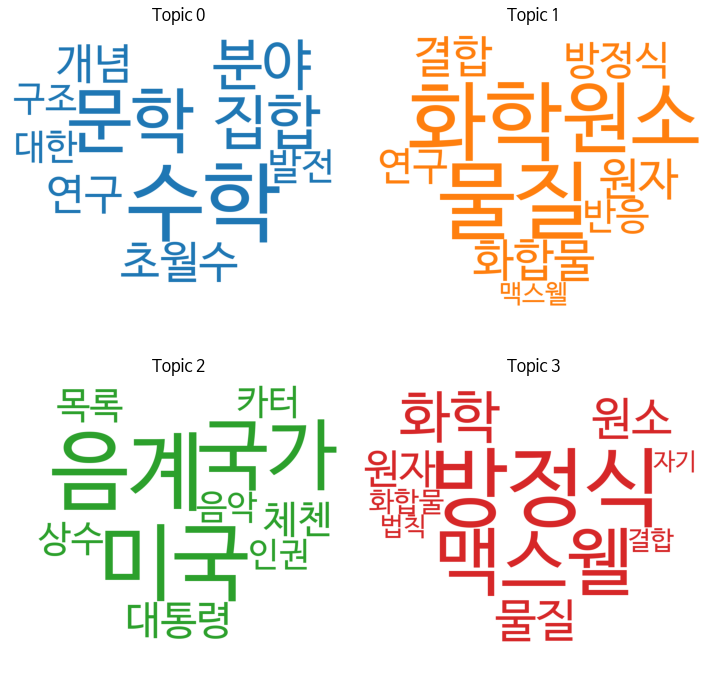

In [31]:
# 토픽별 워드크라우딩
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import numpy as np
from PIL import Image

# 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
cloud = WordCloud(background_color='white',
                  font_path=fontpath,
                  width=2500,
                  height=1800,
                  mask=mask,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
# plt.savefig('토픽1.png')
plt.show()

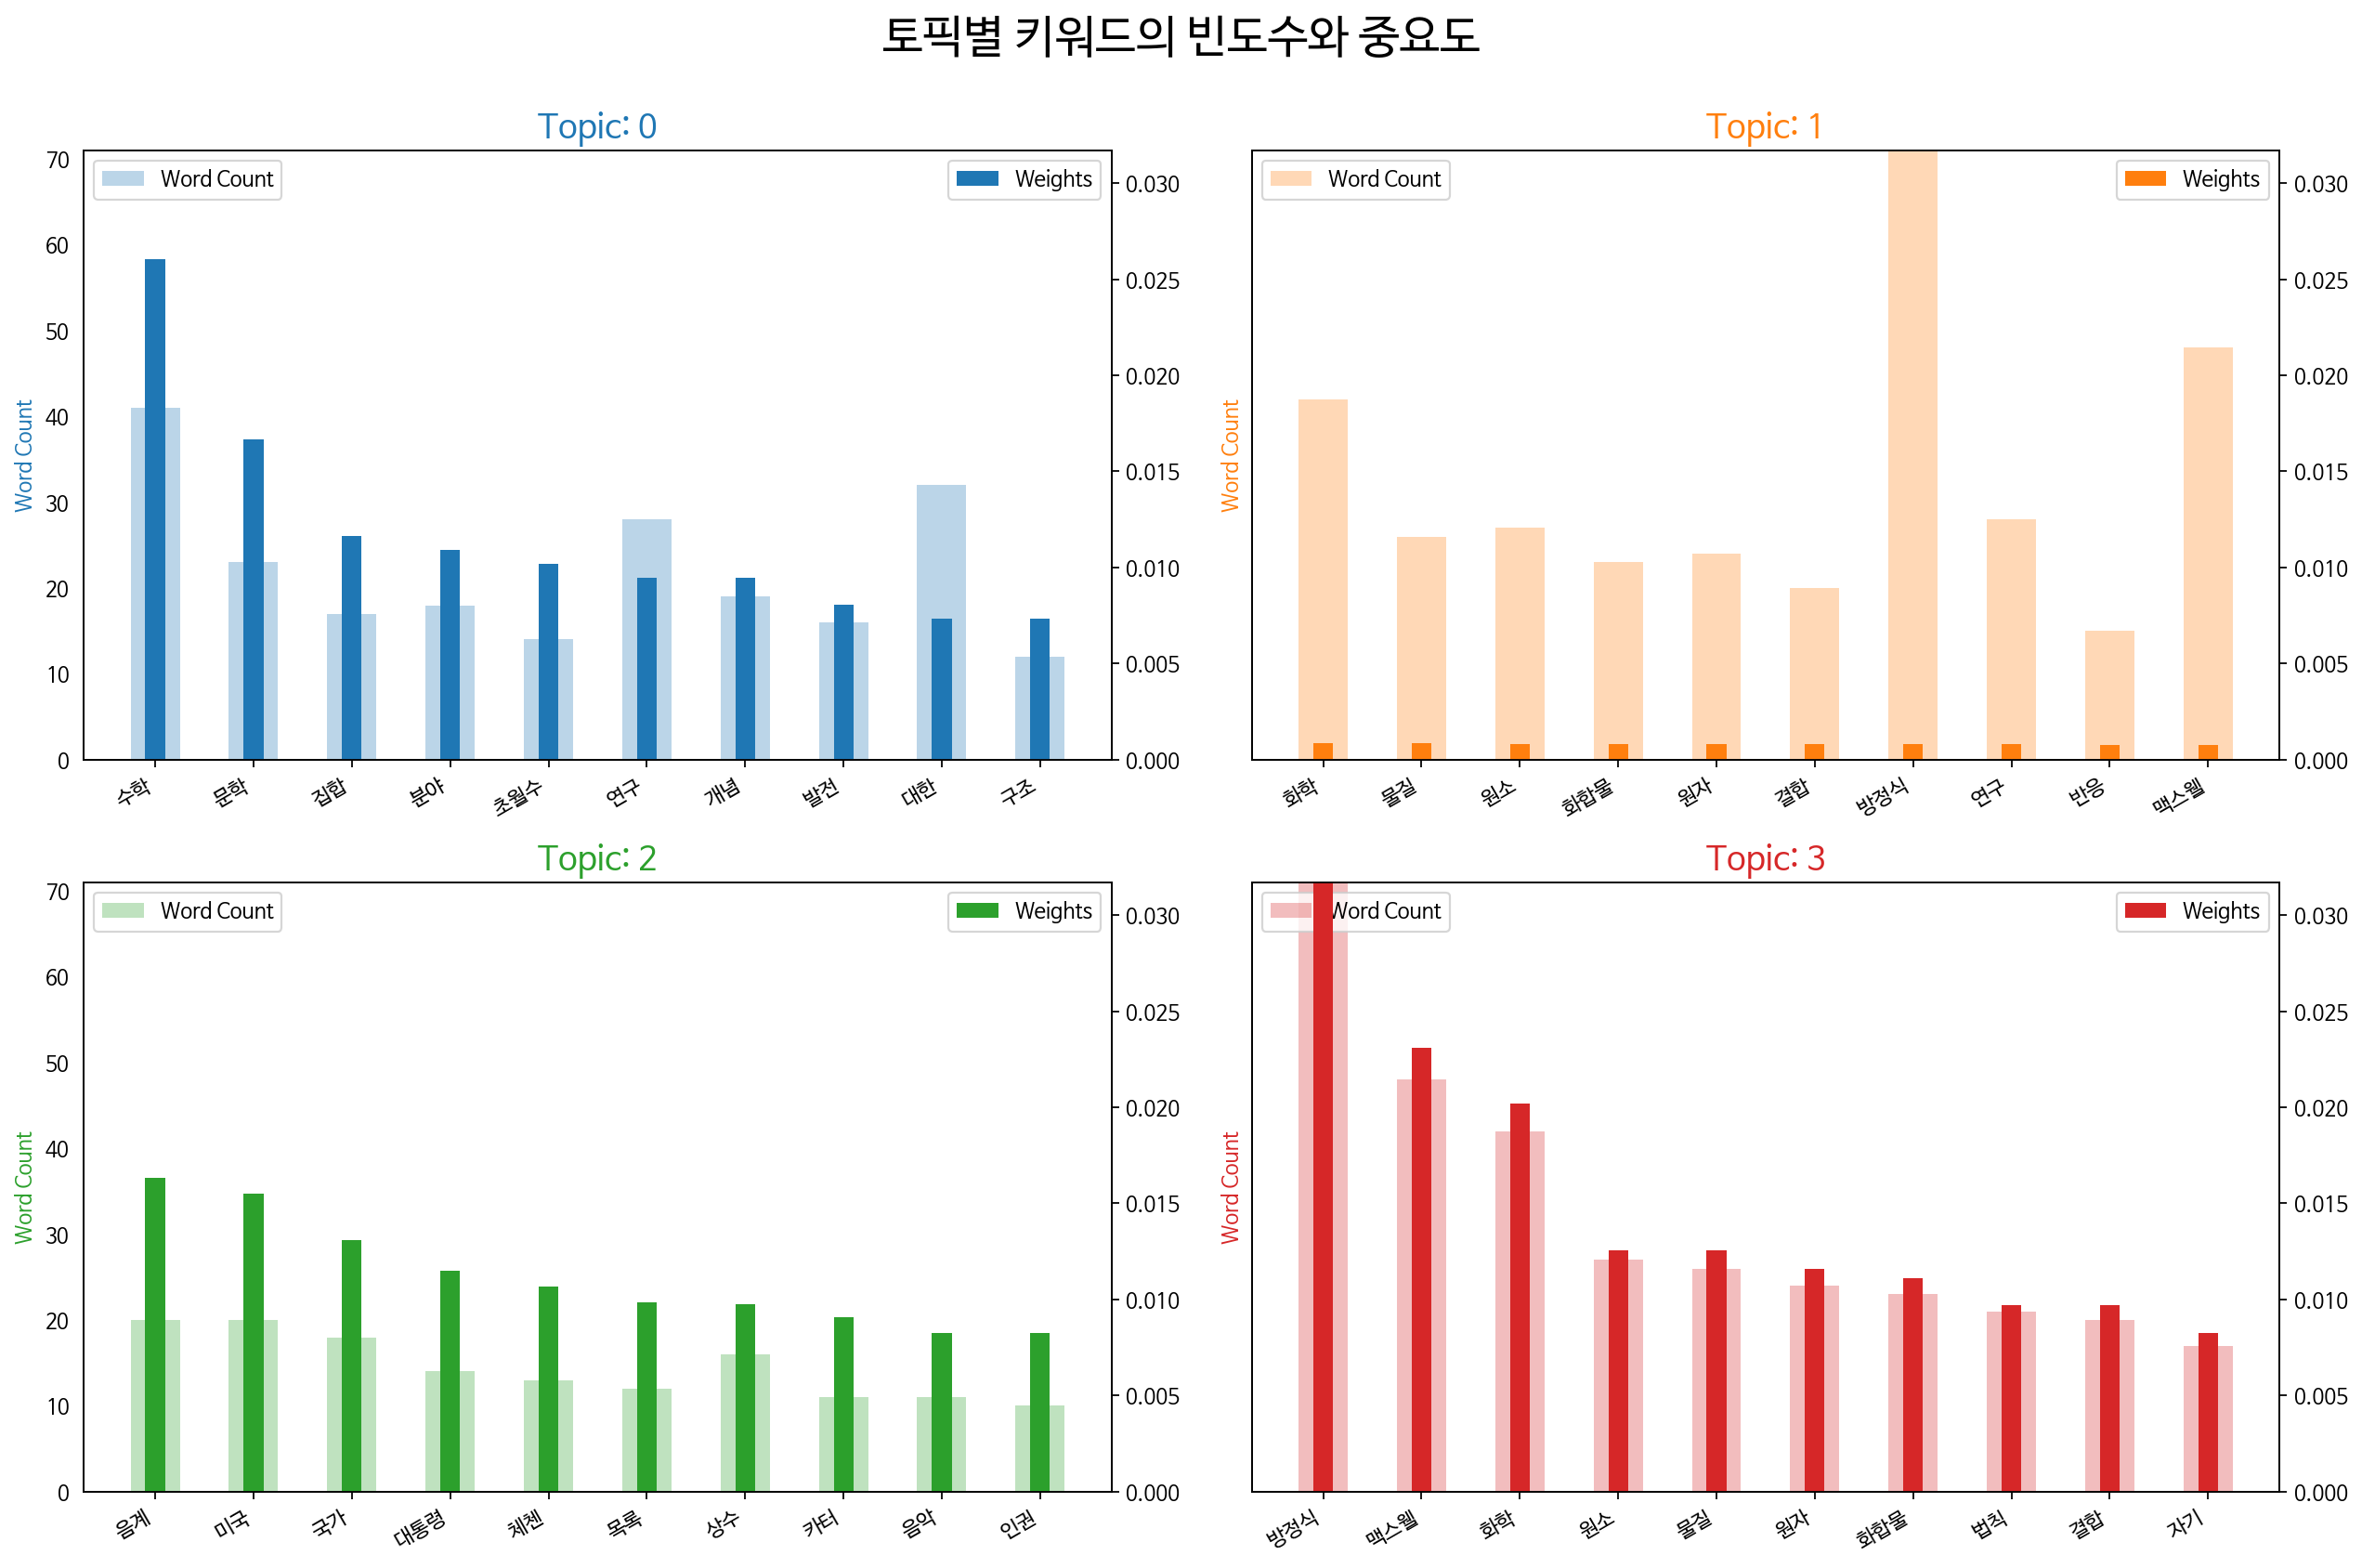

In [32]:
# 토픽별 키워드의 빈도수와 중요도 시각화 
from collections import Counter
import matplotlib.font_manager as fm

topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in tdoc_list for w in w_list]
counter = Counter(data_flat)

# 주제별 토픽
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fontpath ='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

# 토픽별 키워드의 빈도수와 중요도
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, max(df['importance'])); ax.set_ylim(0, max(df['word_count']))
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('토픽별 키워드의 빈도수와 중요도', fontsize=22, y=1.05)    
# plt.savefig('토픽2.png')
plt.show()

In [33]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=f00dcccbcea1c8c3ffa65568e79e6c5101669aa69884f5c894b7f77aa769eb71
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


In [34]:
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, g_corpus, g_dictionary)
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.170007 -0.075685       1        1  47.166068
0      0.006213  0.157034       2        1  28.595880
2     -0.159695 -0.073669       3        1  24.171153
1     -0.016525 -0.007680       4        1   0.066899, topic_info=     Term       Freq      Total Category  logprob  loglift
1168  맥스웰  40.000000  40.000000  Default  30.0000  30.0000
371   방정식  59.000000  59.000000  Default  29.0000  29.0000
419    수학  31.000000  31.000000  Default  28.0000  28.0000
1068   화학  35.000000  35.000000  Default  27.0000  27.0000
621    문학  18.000000  18.000000  Default  26.0000  26.0000
...   ...        ...        ...      ...      ...      ...
828    동위   0.001912   7.302046   Topic4  -7.1718  -0.9379
554    현대   0.001915   9.590399   Topic4  -7.1706  -1.2093
377    변화   0.001916  11.038205   Topic4  -7.1697  -1.3490
298    구성   0.001918  12.607285   Topic4  -7.1688  -1.4811
389    사용   0.001916  12.682225   Topic4  -7.1700  -1.4882

[258 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1271      2  0.909460    가산
276       1  0.793065    가지
276       2  0.226590    가지
585       2  0.897606    감상
774       1  0.702472    감지
...     ...       ...   ...
266       3  0.860678    협정
1068      1  0.976133    화학
1071      1  1.005292   화합물
267       3  0.860650    활동
563       2  0.825291  힐베르트

[265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])